In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## Loading data
- weather_v2.pkl: source on VM
- grass_clean_mel.csv: generate from "pollen_count.ipynb"

In [2]:
# weather dataset provided by the client
weather_dict = pickle.load(open('../data/weather_v2.pkl', "rb"))
# Melbourne weather dataset
mel_df = weather_dict[1]

# preprocessed Melbourne grass pollen count dataset 
grass_df = pd.read_csv('grass_clean_mel.csv')

In [3]:
# change data type of Melbourne grass pollen count data
grass_df['Count Date'] = grass_df['Count Date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

# Merge Melbourne grass pollen count data and Melboure weather data
grass_df = grass_df[['Count Date', 'grass_count']].set_index('Count Date').join(mel_df)
grass_df = grass_df.dropna()

In [4]:
# convert count to pollen level 
label = [[50, 3], [20, 2], [0, 1]]

def get_label(x):
    for i in label:
        if x >= i[0]:
            return i[1]

grass_df.insert(0, 'grass_level', grass_df['grass_count'].apply(lambda x:get_label(x)))

In [5]:
grass_df['grass_level'].value_counts().sort_index()

1    253
2     83
3     90
Name: grass_level, dtype: int64

[Text(0, 0, '253'), Text(0, 0, '83'), Text(0, 0, '90')]

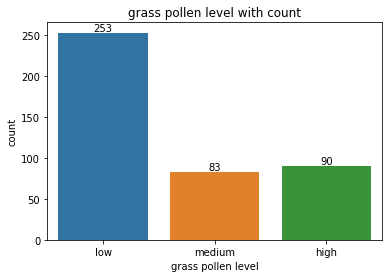

In [6]:
grass_pollen_level_dict = {1: "low", 2: 'medium', 3: 'high'}

#plt.figure(figsize=(10,6))
ax = sns.barplot(x=grass_df['grass_level'].value_counts().sort_index().rename(index=grass_pollen_level_dict).index, 
                y=grass_df['grass_level'].value_counts().sort_index())
ax.set(xlabel='grass pollen level', ylabel='count', title='grass pollen level with count')
ax.bar_label(ax.containers[0])

In [7]:
# df with numerical predicted variables and raw variables
count_df = grass_df.copy()
count_df = count_df.drop(['grass_level'], axis=1).reset_index(drop=True)
count_df.head(5)

,grass_count,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,...,thermal_time_1D,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D
0,0.0,567.409722,0.014479,291.515625,101588.000000,0.004978,85.603299,281.953993,1.618056,0.277778,...,3.625,35.250,87.500,87.500,486.375,1792.332031,24080.046875,71414.628906,209709.917969,415718.011719
1,0.0,672.985000,0.044749,316.624375,101377.280000,0.004932,199.541875,285.437500,-1.055000,0.590000,...,4.375,36.250,89.250,89.250,487.500,2489.031250,24086.992188,71454.339844,209820.257812,415804.148438
2,3.0,1351.370000,0.038105,320.018125,100350.040000,0.005645,184.114375,289.835625,2.420000,-1.575000,...,3.500,36.500,90.875,90.875,487.375,2488.683594,24090.761719,71490.339844,209930.417969,415890.109375
3,0.0,896.015000,0.011231,318.508125,101197.400000,0.005693,178.778750,286.084375,3.255000,-0.600000,...,2.750,36.125,91.000,91.000,487.000,2488.316406,24092.531250,71522.316406,210040.222656,415975.867188
4,0.0,1343.250000,0.055731,309.666466,101231.692308,0.005118,225.740385,287.077524,4.971154,-1.826923,...,3.250,36.125,91.125,91.125,487.500,2587.183594,24192.238281,71650.304688,210248.914062,416160.636719


In [8]:
# df with categorical predicted variables and raw variables
label_df = grass_df.copy()
label_df = label_df.drop(['grass_count'], axis=1).reset_index(drop=True)
label_df.head(5)

,grass_level,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,...,thermal_time_1D,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D
0,1,567.409722,0.014479,291.515625,101588.000000,0.004978,85.603299,281.953993,1.618056,0.277778,...,3.625,35.250,87.500,87.500,486.375,1792.332031,24080.046875,71414.628906,209709.917969,415718.011719
1,1,672.985000,0.044749,316.624375,101377.280000,0.004932,199.541875,285.437500,-1.055000,0.590000,...,4.375,36.250,89.250,89.250,487.500,2489.031250,24086.992188,71454.339844,209820.257812,415804.148438
2,1,1351.370000,0.038105,320.018125,100350.040000,0.005645,184.114375,289.835625,2.420000,-1.575000,...,3.500,36.500,90.875,90.875,487.375,2488.683594,24090.761719,71490.339844,209930.417969,415890.109375
3,1,896.015000,0.011231,318.508125,101197.400000,0.005693,178.778750,286.084375,3.255000,-0.600000,...,2.750,36.125,91.000,91.000,487.000,2488.316406,24092.531250,71522.316406,210040.222656,415975.867188
4,1,1343.250000,0.055731,309.666466,101231.692308,0.005118,225.740385,287.077524,4.971154,-1.826923,...,3.250,36.125,91.125,91.125,487.500,2587.183594,24192.238281,71650.304688,210248.914062,416160.636719


In [9]:
# independent variables
X = count_df.drop(['grass_count'], axis=1).reset_index(drop=True)

# target/predicted variable i.e grass pollen count (numerical)
Y_count = count_df['grass_count']
# target/predicted variable i.e grass pollen count (categorical)
Y_label = label_df['grass_level']


feature_name = list(X.columns)
num_feats = 15

# Regression: grass count

## SelectKBest

The SelectKBest technique to extract the best features in a dataset based on the highest k-score. We can use this method for classification and regression data by modifying the "score function" option. It is important to determine which score function and the value of k to use.</br>

- Regression: f_regression</br>

In [10]:
# regression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [11]:
# f_regression: correlation
f_regression_selector = SelectKBest(f_regression, k=num_feats)
f_regression_selector.fit(X, Y_count)
f_regression_support = f_regression_selector.get_support()
f_regression_feature = X.loc[:,f_regression_support].columns.tolist()
#print(str(len(f_regression_feature)), 'SelectKBest f_regression selected features')

#f_regression_feature

In [12]:
print(str(len(f_regression_feature)), 'selected features from SelectKBest f_regression')
f_regression_df = pd.DataFrame(f_regression_feature)
f_regression_df['Explanation'] = ['surface downwelling shortwave flux in air', 
                                  'air temperature',
                                  'mean of meridional speed of air moving towards the northward at 10m', 
                                  'sum of surface downwelling shortwave flux in air',
                                  'sum of meridional speed of air moving towards the northward at 10m', 
                                  'maximun air temperature', 
                                  'maximun air temperature increase in 1h', 
                                  'maximun air temperature in the afternoon', 
                                  'minimun air temperature in the afternoon', 
                                  'maximun air temperature increase for 1h in the afternoon',
                                  'maximun air temperature increase for 3h in a day',
                                  'maximun air temperature decrease for 3h in a day',
                                  'mean wind speed from the north',
                                  'sum of surface downwelling shortwave flux in air for the past 1 day',
                                  'heat sum for the phase for the past 1 day']

f_regression_df = f_regression_df.rename(columns={0: "Feature"})
with pd.option_context('display.max_colwidth', None):
    display(f_regression_df)

15 selected features from SelectKBest f_regression


,Feature,Explanation
0,av_swsfcdown,surface downwelling shortwave flux in air
1,av_temp_scrn,air temperature
2,av_vwnd10m,mean of meridional speed of air moving towards the northward at 10m
3,av_swsfcdown_sum,sum of surface downwelling shortwave flux in air
4,av_vwnd10m_sum,sum of meridional speed of air moving towards the northward at 10m
5,av_temp_scrn_max,maximun air temperature
6,av_temp_scrn_max_1h_rise,maximun air temperature increase in 1h
7,av_temp_scrn_max_afternoon,maximun air temperature in the afternoon
8,av_temp_scrn_min_afternoon,minimun air temperature in the afternoon
9,av_temp_scrn_max_afternoon_1hrise,maximun air temperature increase for 1h in the afternoon


In [13]:
# mi_regression_selector = SelectKBest(mutual_info_regression, k=num_feats)
# mi_regression_selector.fit(X, Y_count)
# mi_regression_support = mi_regression_selector.get_support()
# mi_regression_feature = X.loc[:,mi_regression_support].columns.tolist()
# # print(str(len(mi_regression_feature)), 'SelectKBest mutual_info_regression selected features')

# pd.DataFrame(mi_regression_feature)

In [14]:
# print(str(len(mi_regression_feature)), 'selected features from SelectKBest mutual_info_regression')
# mi_regression_df = pd.DataFrame(mi_regression_feature)
# mi_regression_df['Explanation'] = ['air temperature',
#                                    'maximun air temperature',
#                                    'maximum air pressure at sea level decrease for 3h',
#                                    'maximun air temperature in the afternoon', 
#                                    'minimun air temperature in the afternoon',
#                                    'sum of air temperature in the afternoon',
#                                    'sum of air temperature in a day',
#                                    'sum of days of surface downwelling shortwave flux in air for the past 10 days',
#                                    'hours of surface downwelling shortwave flux in air for the past 30 days',
#                                    'hours of surface downwelling shortwave flux in air for the past 90 days',
#                                    'sum of days of surface downwelling shortwave flux in air for the past 90 days',
#                                    'sum of days of chilling temperatures where in the range of 0°C to 8°C for the past 30 days',
#                                    'hours of chilling temperatures where in the range of 0°C to 8°C for the past 90 days',
#                                    'heat sum for the phase for the past 180 days',
#                                    'moisture content of soil layer for the past 90 days']

# mi_regression_df = mi_regression_df.rename(columns={0: "Feature"})


# with pd.option_context('display.max_colwidth', None):
#     display(mi_regression_df)


In [15]:
# summary

# # put all selection together
# feature_selection_df_count = pd.DataFrame({'Feature':feature_name, 'Pearson':f_regression_support, 
#                                            'Mutual_info':mi_regression_support})
# # count the selected times for each feature
# feature_selection_df_count['Total'] = np.sum(feature_selection_df_count, axis=1)


# # display the top 30
# feature_selection_df_count = feature_selection_df_count.sort_values(['Total','Feature'] , ascending=False)
# feature_selection_df_count.index = range(1, len(feature_selection_df_count)+1)
# feature_selection_df_count = feature_selection_df_count.loc[feature_selection_df_count['Total'] == 2]
# # feature_selection_df_count['Explanation'] = ['minimun air temperature in the afternoon',
# #                                              'maximun air temperature in the afternoon',
# #                                              'maximun air temperature',
# #                                              'air temperature']

# # with pd.option_context('display.max_colwidth', None):
# #     display(feature_selection_df_count)

# feature_selection_df_count

# Classification: grass count level

## SelectKBest
- Classification: f_classif, mutual_info_classif, chi2</br>

In [16]:
# classification
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler

# If using 'chi2' score function, need to use MinMaxScaler in X since X contains negative values.

# Pearson's chi square test (goodness of fit) does not apply to negative values. It's logical because 
# the chi square test assumes frequencies distribution and a frequency can't be a negative number. 
# Consequently, sklearn.feature_selection.chi2 asserts the input is non-negative.

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, Y_label)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
# print(str(len(chi_feature)), 'selected features')

# chi_feature

In [17]:
print(str(len(chi_feature)), 'selected features from SelectKBest chi2')
chi_feature_df = pd.DataFrame(chi_feature)
chi_feature_df['Explanation'] = ['air temperature',
                                 'maximun air temperature',
                                 'maximun air temperature increase in 1h',
                                 'maximun air temperature in the afternoon', 
                                 'minimun air temperature in the afternoon',
                                 'maximun air temperature increase for 3h in a day',
                                 'hours of precipitation in the morning', 
                                 'mean speed of wind from north',
                                 'total speed of wind from north',
                                 'total speed of wind from south',
                                 'hours of forcing temperature for the past 1 day',
                                 'hours of chilling temperatures for the past 10 days',
                                 'hours of chilling temperatures for the past 30 days',
                                 'sum of days of chilling temperatures for the past 30 days',
                                 'heat sum for the phase for the past 1 day']

chi_feature_df = chi_feature_df.rename(columns={0: "Feature"})
with pd.option_context('display.max_colwidth', None):
    display(chi_feature_df)

15 selected features from SelectKBest chi2


,Feature,Explanation
0,av_temp_scrn,air temperature
1,av_temp_scrn_max,maximun air temperature
2,av_temp_scrn_max_1h_rise,maximun air temperature increase in 1h
3,av_temp_scrn_max_afternoon,maximun air temperature in the afternoon
4,av_temp_scrn_min_afternoon,minimun air temperature in the afternoon
5,av_temp_scrn_max_day_3hrise,maximun air temperature increase for 3h in a day
6,morning_hrs_of_precp,hours of precipitation in the morning
7,Wind-North_mean,mean speed of wind from north
8,Wind-North_total,total speed of wind from north
9,Wind-South_total,total speed of wind from south


In [18]:
# f_classif_selector = SelectKBest(f_classif, k=num_feats)
# f_classif_selector.fit(X_norm, Y_label)
# f_classif_support = f_classif_selector.get_support()
# f_classif_feature = X.loc[:,f_classif_support].columns.tolist()
# print(str(len(f_classif_feature)), 'selected features')

# f_classif_feature

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, Y_label)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')

# rfe_feature

Fitting estimator with 171 features.
Fitting estimator with 161 features.
Fitting estimator with 151 features.
Fitting estimator with 141 features.
Fitting estimator with 131 features.
Fitting estimator with 121 features.
Fitting estimator with 111 features.
Fitting estimator with 101 features.
Fitting estimator with 91 features.
Fitting estimator with 81 features.
Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.


In [20]:
print(str(len(rfe_feature)), 'selected features from RFE')
rfe_feature_df = pd.DataFrame(rfe_feature)
rfe_feature_df['Explanation'] = ['air temperature',
                                 'maximun 10 meter wind vertival-component (Mean) decrease in 1h',
                                 'maximun air pressure at sea level decrease in 3h in a day',
                                 'maximun specific_humidity decrease in 1h in the afternoon', 
                                 'minimun air temperature in the afternoon',
                                 'total hours of precipitation',
                                 'mean speed of wind from north',
                                 'total speed of wind from south',
                                 'sum of surface downwelling shortwave flux in air for the past 180 days',
                                 'sum of forcing temperature for the past 1 day',
                                 'hours of chilling temperatures for the past 30 days',
                                 'hours of chilling temperatures for the past 90 days',
                                 'hours of chilling temperatures for the past 180 days',
                                 'sum of topt for the past 30 days',
                                 'moisture content of soil layer for the past 180 days']

rfe_feature_df = rfe_feature_df.rename(columns={0: "Feature"})
with pd.option_context('display.max_colwidth', None):
    display(rfe_feature_df)

15 selected features from RFE


,Feature,Explanation
0,av_temp_scrn,air temperature
1,av_wndgust10m_max_1h_fall,maximun 10 meter wind vertival-component (Mean) decrease in 1h
2,av_mslp_max_day_3hfall,maximun air pressure at sea level decrease in 3h in a day
3,av_qsair_scrn_max_afternoon_1hfall,maximun specific_humidity decrease in 1h in the afternoon
4,av_temp_scrn_min_afternoon,minimun air temperature in the afternoon
5,total_hrs_of_precp,total hours of precipitation
6,Wind-North_mean,mean speed of wind from north
7,Wind-South_total,total speed of wind from south
8,av_swsfcdown_sum_180D,sum of surface downwelling shortwave flux in air for the past 180 days
9,forcing_temp_sum_1D,sum of forcing temperature for the past 1 day


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, Y_label)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
# print(str(len(embeded_lr_feature)), 'selected features')

# embeded_lr_feature

In [22]:
print(str(len(embeded_lr_feature)), 'selected features from Lasso regularization')
embeded_lr_feature_df = pd.DataFrame(embeded_lr_feature)
embeded_lr_feature_df['Explanation'] = ['air temperature',
                                        'maximum air temperature',
                                        'maximun air pressure at sea level decrease in 1h in the afternoon',
                                        'maximum air temperature decrease in 3h in a day',
                                        'mean speed of wind from north',
                                        'total speed of wind from south',
                                        'sum of accumulated total precipitation amount at the surface for the past 90 days',
                                        'sum of surface downwelling shortwave flux in air for the past 180 days',
                                        'hours of forcing temperature for the past 1 day',
                                        'sum of forcing temperature for the past 1 day',
                                        'hours of chilling temperatures for the past 30 days',
                                        'hours of chilling temperatures for the past 90 days',
                                        'hours of chilling temperatures for the past 180 days',
                                        'heat sum for the phase for the past 30 days',
                                        'moisture content of soil layer for the past 180 days']

embeded_lr_feature_df = embeded_lr_feature_df.rename(columns={0: "Feature"})
with pd.option_context('display.max_colwidth', None):
    display(embeded_lr_feature_df)

15 selected features from Lasso regularization


,Feature,Explanation
0,av_temp_scrn,air temperature
1,av_temp_scrn_max,maximum air temperature
2,av_mslp_max_afternoon_1hfall,maximun air pressure at sea level decrease in 1h in the afternoon
3,av_temp_scrn_max_day_3hfall,maximum air temperature decrease in 3h in a day
4,Wind-North_mean,mean speed of wind from north
5,Wind-South_total,total speed of wind from south
6,accum_prcp_numhours_90D,sum of accumulated total precipitation amount at the surface for the past 90 days
7,av_swsfcdown_sum_180D,sum of surface downwelling shortwave flux in air for the past 180 days
8,forcing_temp_numhours_1D,hours of forcing temperature for the past 1 day
9,forcing_temp_sum_1D,sum of forcing temperature for the past 1 day


In [23]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df_label = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 
                                     'RFE':rfe_support, 'L1(Logistics)':embeded_lr_support,})
# count the selected times for each feature
feature_selection_df_label['Total'] = np.sum(feature_selection_df_label, axis=1)

# Display most common features
feature_selection_df_label = feature_selection_df_label.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df_label = feature_selection_df_label.loc[feature_selection_df_label['Total'] >= 2]
feature_selection_df_label.index = range(1, len(feature_selection_df_label)+1)

feature_selection_df_label['Explanation'] = ['hours of chilling temperatures for the past 30 days',
                                             'air temperature', 
                                             'total speed of wind from south',
                                             'mean speed of wind from north',
                                             'moisture content of soil layer for the past 180 days',
                                             'sum of forcing temperature for the past 1 day',
                                             'hours of forcing temperature for the past 1 day',
                                             'hours of chilling temperatures for the past 90 days',
                                             'hours of chilling temperatures for the past 180 days',
                                             'minimun air temperature in the afternoon',
                                             'maximum air temperature',
                                             'sum of surface downwelling shortwave flux in air for the past 180 days']

with pd.option_context('display.max_colwidth', None):
    display(feature_selection_df_label)
    

,Feature,Chi-2,RFE,L1(Logistics),Total,Explanation
1,chilling_temp_numhours_30D,True,True,True,3,hours of chilling temperatures for the past 30 days
2,av_temp_scrn,True,True,True,3,air temperature
3,Wind-South_total,True,True,True,3,total speed of wind from south
4,Wind-North_mean,True,True,True,3,mean speed of wind from north
5,soil_mois_180D,False,True,True,2,moisture content of soil layer for the past 180 days
6,forcing_temp_sum_1D,False,True,True,2,sum of forcing temperature for the past 1 day
7,forcing_temp_numhours_1D,True,False,True,2,hours of forcing temperature for the past 1 day
8,chilling_temp_numhours_90D,False,True,True,2,hours of chilling temperatures for the past 90 days
9,chilling_temp_numhours_180D,False,True,True,2,hours of chilling temperatures for the past 180 days
10,av_temp_scrn_min_afternoon,True,True,False,2,minimun air temperature in the afternoon


In [24]:
# Summary of methods of feature selection

chi_feature_df = chi_feature_df.rename(columns={'Feature': 'Chi-2'})
rfe_feature_df = rfe_feature_df.rename(columns={'Feature': 'RFE'})
embeded_lr_feature_df = embeded_lr_feature_df.rename(columns={'Feature': 'L1(Logistics)'})

df1 = pd.concat([chi_feature_df, rfe_feature_df], axis=1)
df2 = pd.concat([df1, embeded_lr_feature_df], axis=1)

df2 = df2.drop(['Explanation'], axis=1).reset_index(drop=True)

print(str(len(embeded_lr_feature)), 'selected features from SelectKBest chi2, RFE and Lasso regularization')
df2

15 selected features from SelectKBest chi2, RFE and Lasso regularization


,Chi-2,RFE,L1(Logistics)
0,av_temp_scrn,av_temp_scrn,av_temp_scrn
1,av_temp_scrn_max,av_wndgust10m_max_1h_fall,av_temp_scrn_max
2,av_temp_scrn_max_1h_rise,av_mslp_max_day_3hfall,av_mslp_max_afternoon_1hfall
3,av_temp_scrn_max_afternoon,av_qsair_scrn_max_afternoon_1hfall,av_temp_scrn_max_day_3hfall
4,av_temp_scrn_min_afternoon,av_temp_scrn_min_afternoon,Wind-North_mean
5,av_temp_scrn_max_day_3hrise,total_hrs_of_precp,Wind-South_total
6,morning_hrs_of_precp,Wind-North_mean,accum_prcp_numhours_90D
7,Wind-North_mean,Wind-South_total,av_swsfcdown_sum_180D
8,Wind-North_total,av_swsfcdown_sum_180D,forcing_temp_numhours_1D
9,Wind-South_total,forcing_temp_sum_1D,forcing_temp_sum_1D
